NOORIN NASHIKA M | 24BAD084
First 5 Rows:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Gaussian Naïve Bayes Performance
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weigh

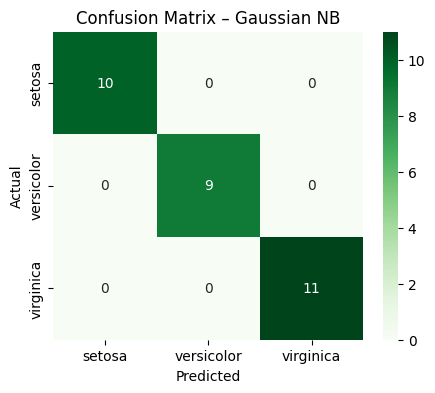

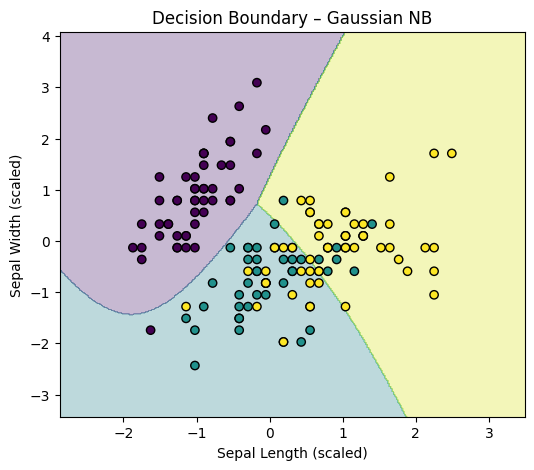

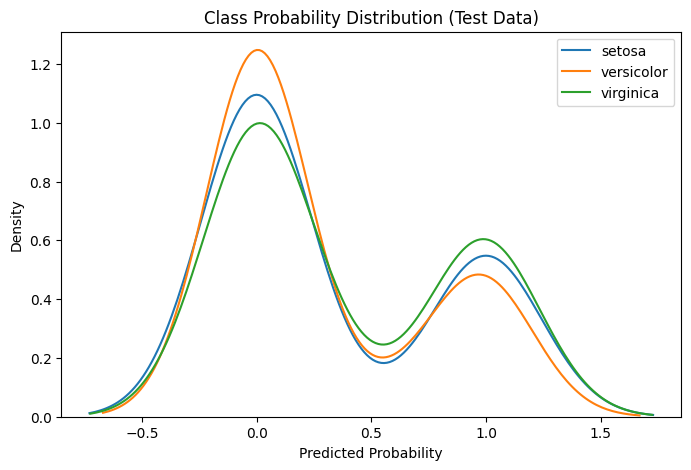

In [1]:
# EXPT NO: 4 – Gaussian Naive Bayes
# NOORIN NASHIKA M
# 24BAD084

print("NOORIN NASHIKA M | 24BAD084")
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Converting  to DataFrame for inspection
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

print("First 5 Rows:\n")
print(df.head())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Evaluation Metrics
print("\nGaussian Naïve Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Comparing with Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

# VISUALIZATION 1 – CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Gaussian NB")
plt.show()

# VISUALIZATION 2 – DECISION BOUNDARY
# (Using first two features: Sepal Length & Width)
X_db = X_scaled[:, :2]  # first two features

X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_db, y, test_size=0.2, random_state=42
)

model_db = GaussianNB()
model_db.fit(X_train_db, y_train_db)

# Creating mesh grid
x_min, x_max = X_db[:,0].min() - 1, X_db[:,0].max() + 1
y_min, y_max = X_db[:,1].min() - 1, X_db[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_db.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_db[:,0], X_db[:,1], c=y, edgecolor='k')
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("Decision Boundary – Gaussian NB")
plt.show()

# VISUALIZATION 3 – PROBABILITY DISTRIBUTION PLOT
probs = gnb.predict_proba(X_test)

plt.figure(figsize=(8,5))
for i in range(3):
    sns.kdeplot(probs[:, i], label=class_names[i])

plt.title("Class Probability Distribution (Test Data)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

